<a href="https://colab.research.google.com/github/Meshal6299/multilingual-movie-reviews-NLP/blob/main/notebooks/01_data_cleaning_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing libraries
import pandas as pd
import re
import contractions
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
#Loading the data
eng = pd.read_csv("../data/raw/sampled_imdb_en.csv")
spa = pd.read_csv("../data/raw/sampled_imdb_es.csv")

eng["language"] = "english"
spa["language"] = "spanish"

print(eng.head())
print("\n")
print(spa.head())

                                              review sentiment language
0  This is one of the best crime-drama movies dur...  positive  english
1  I bought the DVD version of this movie on the ...  negative  english
2  I love the Jurassic Park movies, they are thre...  negative  english
3  This is the best movie I have ever seen.<br />...  positive  english
4  This is probably the best movie from director ...  positive  english


                                           review_es sentiment language
0  Esta es una de las mejores películas de crimen...  positivo  spanish
1  Compré la versión de DVD de esta película sobr...  negativo  spanish
2  Me encantan las películas de Jurassic Park, so...  negativo  spanish
3  Esta es la mejor película que he visto. He vis...  positivo  spanish
4  Esta es probablemente la mejor película del di...  positivo  spanish


In [8]:
#cleaning the dataset from any unwanted charecters and making all letters are lowercase
def clean_text(text):
    text = str(text).lower()                        # convert all letter to lowercase
    text = contractions.fix(text)                   # expand contractions
    text = re.sub(r'[-/]', ' ', text)               # replace - and / with space
    text = re.sub(r'<.*?>', ' ', text)              # remove html tags
    text = re.sub(r'http\S+', ' ', text)            # remove urls
    text = re.sub(r"[^a-zA-Záéíóúüñ'\s]", ' ', text)# keep only letters and spaces (including Spanish characters)
    text = re.sub(r'\s+', ' ', text).strip()        # remove extra spaces
    return text

eng["clean_text"] = eng["review"].apply(clean_text)
spa["clean_text"] = spa["review_es"].apply(clean_text)

print(eng.head())
print("\n")
print(spa.head())

                                              review sentiment language  \
0  This is one of the best crime-drama movies dur...  positive  english   
1  I bought the DVD version of this movie on the ...  negative  english   
2  I love the Jurassic Park movies, they are thre...  negative  english   
3  This is the best movie I have ever seen.<br />...  positive  english   
4  This is probably the best movie from director ...  positive  english   

                                          clean_text  
0  this is one of the best crime drama movies dur...  
1  i bought the dvd version of this movie on the ...  
2  i love the jurassic park movies they are three...  
3  this is the best movie i have ever seen i have...  
4  this is probably the best movie from director ...  


                                           review_es sentiment language  \
0  Esta es una de las mejores películas de crimen...  positivo  spanish   
1  Compré la versión de DVD de esta película sobr...  negativo  spa

In [9]:
#showing the sentiment distribution of each language
print("English dataset size:", len(eng))
print("Sentiment distribution (English):")
print(eng["sentiment"].value_counts())

print("------------------------------------------")

print("Spanish dataset size:", len(spa))
print("Sentiment distribution (Spanish):")
print(spa["sentiment"].value_counts())

English dataset size: 33000
Sentiment distribution (English):
sentiment
positive    16500
negative    16500
Name: count, dtype: int64
------------------------------------------
Spanish dataset size: 33000
Sentiment distribution (Spanish):
sentiment
positivo    16500
negativo    16500
Name: count, dtype: int64


In [10]:
#showing the average length of word per review  for each Language
eng["review_length"] = eng["clean_text"].apply(lambda x: len(x.split()))
spa["review_length"] = spa["clean_text"].apply(lambda x: len(x.split()))

print("Average English review length:", eng["review_length"].mean())
print("Average Spanish review length:", spa["review_length"].mean())

Average English review length: 233.46151515151516
Average Spanish review length: 239.30327272727274


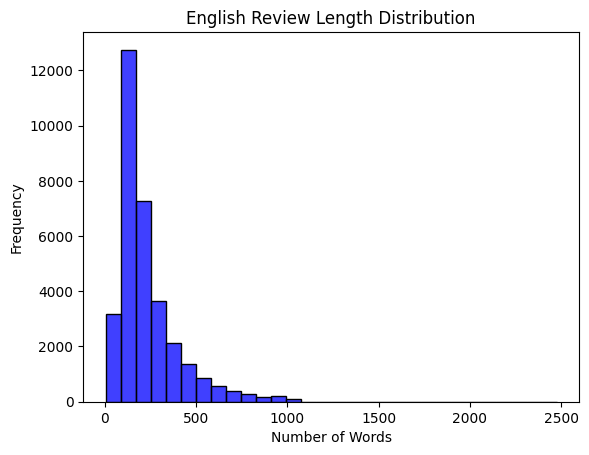

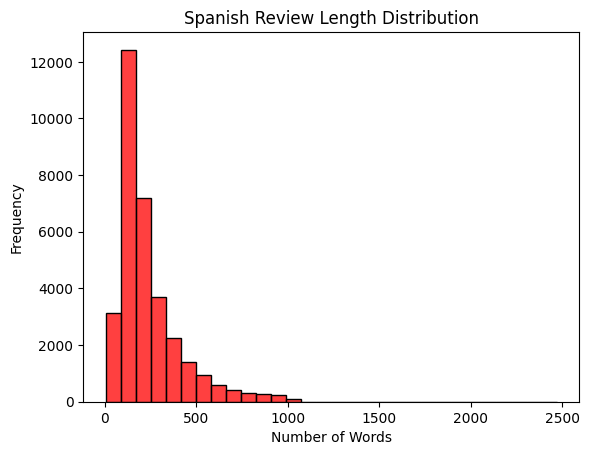

In [11]:
#showing the length distribution
sns.histplot(eng["review_length"], color="blue", bins=30)
plt.title("English Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

sns.histplot(spa["review_length"], color="red", bins=30)
plt.title("Spanish Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

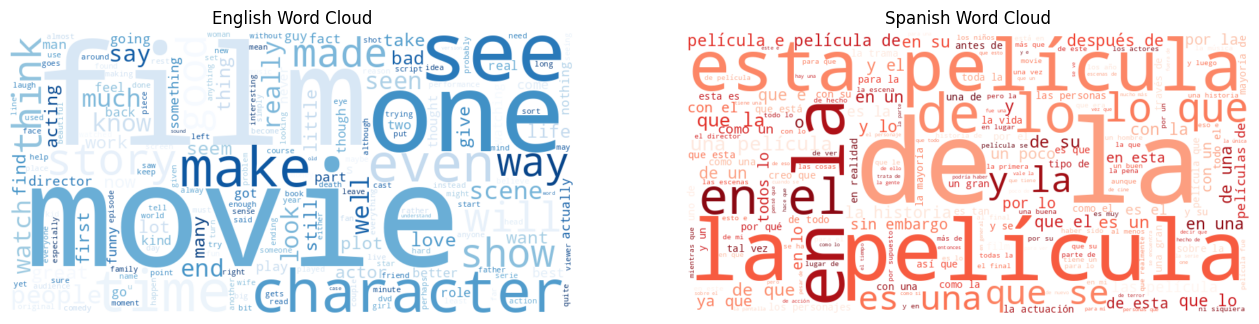

In [12]:
#creating a wordcloud for showing the most frequent usef words in each language
english_text = " ".join(eng["clean_text"].dropna().tolist())
spanish_text = " ".join(spa["clean_text"].dropna().tolist())

wordcloud_en = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="Blues"
).generate(english_text)

wordcloud_es = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="Reds"
).generate(spanish_text)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_en, interpolation="bilinear")
plt.axis("off")
plt.title("English Word Cloud", fontsize=12)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_es, interpolation="bilinear")
plt.axis("off")
plt.title("Spanish Word Cloud", fontsize=12)

plt.show()

In [13]:
# Keep only the required columns
eng_final = eng[["clean_text", "sentiment"]]
spa_final = spa[["clean_text", "sentiment"]]

# Save the cleaned datasets to CSV files
eng_final.to_csv("../data/processed/01_cleaned_imdb_en.csv", index=False)
spa_final.to_csv("../data/processed/01_cleaned_imdb_es.csv", index=False)

print("✅ Cleaned datasets saved successfully.")

✅ Cleaned datasets saved successfully.
